--- Data Checks ---
DataFrame shape: (506, 14)
Missing values before processing:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Missing values found. Dropping rows with NaNs.
DataFrame shape after dropping NaNs: (501, 14)

--- Training Data Checks Before KNN Fit ---
NaNs in X_train: False
Infs in X_train: False
NaNs in y_train: False
Infs in y_train: False

Mean Squared Error (MSE):  14.19
Root Mean Squared Error:   3.77
R² Score:                  0.81


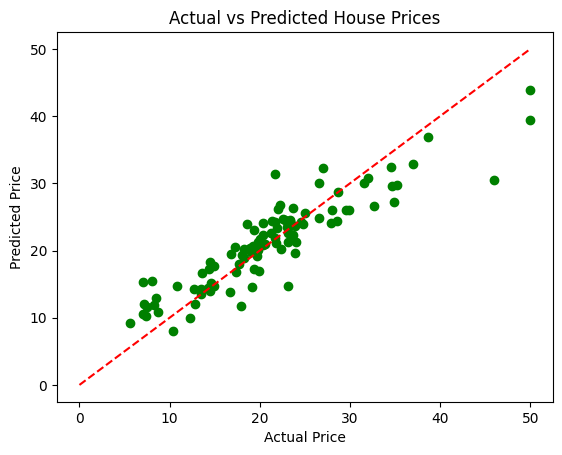

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Boston dataset (if you have the file)
try:
    df = pd.read_csv("BostonHousing.csv")  # replace with your file name
except FileNotFoundError:
    print("Error: BostonHousing.csv not found. Please ensure the file is in the correct directory.")
    exit()

# --- Debugging Steps ---
print("--- Data Checks ---")
print(f"DataFrame shape: {df.shape}")
print(f"Missing values before processing:\n{df.isnull().sum()}")

# Check for infinite values
if np.isinf(df.values).any():
    print("\nWarning: Infinite values found in the DataFrame!")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    print("Infinite values replaced with NaN for further handling.")

# Handle missing values
if df.isnull().any().any():
    print("\nMissing values found. Dropping rows with NaNs.")
    df.dropna(inplace=True)
    print(f"DataFrame shape after dropping NaNs: {df.shape}")
# --- End of Debugging Steps ---

# Separate features and target
y = df['medv']
X = df.drop('medv', axis=1)

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify no NaNs or Infs in training data
print("\n--- Training Data Checks Before KNN Fit ---")
print(f"NaNs in X_train: {np.isnan(X_train).any()}")
print(f"Infs in X_train: {np.isinf(X_train).any()}")
print(f"NaNs in y_train: {y_train.isnull().any()}")
print(f"Infs in y_train: {np.isinf(y_train).any()}")

# KNN Regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE):  {mse:.2f}")
print(f"Root Mean Squared Error:   {rmse:.2f}")
print(f"R² Score:                  {r2:.2f}")

# Optional: Plot predicted vs actual

plt.scatter(y_test, y_pred, color='green')
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")

plt.show()
